<a href="https://colab.research.google.com/github/Ostrich2002/SRiSHTi23/blob/main/SRiSHTi_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
rng = np.random.default_rng(seed=42)

In [2]:
dataset =  datasets.fetch_california_housing()
dataset.target = dataset.target.astype(np.int)
print(dataset.data.shape)
print(dataset.target.shape)

(20640, 8)
(20640,)


<ipython-input-2-0c77f8e533aa>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dataset.target = dataset.target.astype(np.int)


In [8]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query 
  sq = diff*diff 
  dist = sq.sum(1) 
  label = trainlabel[np.argmin(dist)] 
  return label

def NN(traindata, trainlabel, testdata):
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

5,5
6,6
8,9
0,0


(0, 0)

In [10]:
def RandomClassifier(traindata, trainlabel, testdata):

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

In [11]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [12]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

In [13]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


In [14]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

In [15]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


In [16]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


In [17]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


In [18]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


In [19]:
# for nearest neighbours

percentage=[]
found_accuracy=[]
for i in range(10,101,10):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = NN(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  percentage.append(i/100)
  found_accuracy.append(valAccuracy)

<ipython-input-11-de6fd6f2ab06>:4: RuntimeWarning: invalid value encountered in long_scalars
  return correct/len(gtlabel)


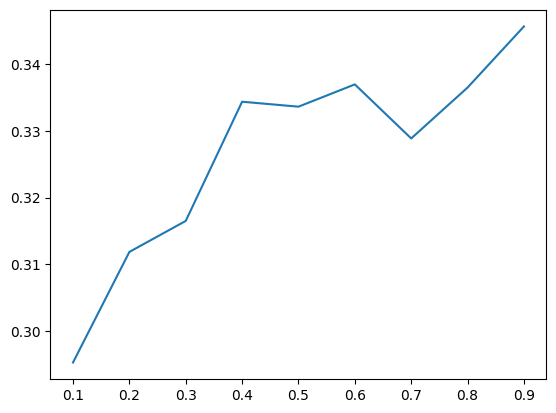

In [20]:
plt.plot(percentage,found_accuracy)

In [21]:
percentage=[]
found_accuracy=[]
for i in range(10,101,10):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  trainpred = NN(traindata, trainlabel, traindata)
  trainAccuracy = Accuracy(trainlabel, trainpred)
  percentage.append(i/100)
  found_accuracy.append( trainAccuracy)

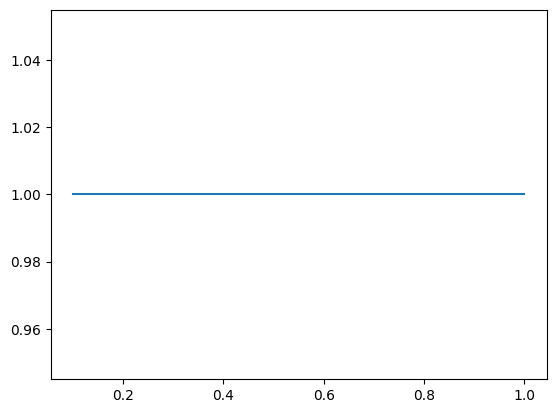

In [22]:
plt.plot(percentage,found_accuracy)

1. The accuracy usually increases with increase the percentage of validation set, with some dips and flats in the middle.
2. For nearest neighbours, the training accuracy always remains one, so it is not affected by the size of the train or validation set
3. 90% or more of validation set gives best accuracy, however it does not looks like a practical solution.

For Random classifier

In [23]:
percentage=[]
found_accuracy=[]
for i in range(10,101,10):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  valpred = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracy = Accuracy(vallabel, valpred)
  percentage.append(i/100)
  found_accuracy.append(valAccuracy)


<ipython-input-11-de6fd6f2ab06>:4: RuntimeWarning: invalid value encountered in long_scalars
  return correct/len(gtlabel)


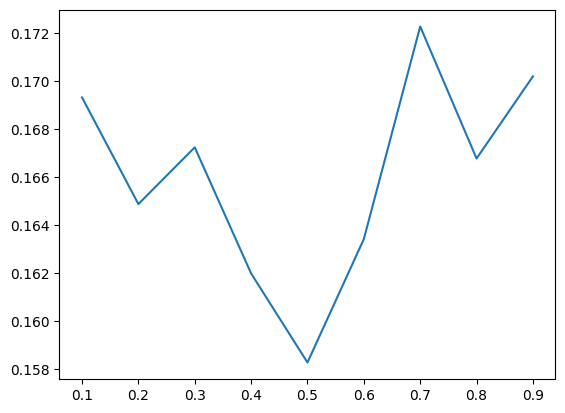

In [24]:
plt.plot(percentage,found_accuracy)

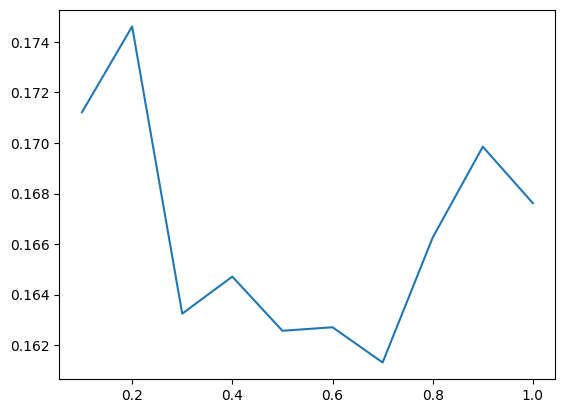

In [25]:
percentage=[]
found_accuracy=[]
for i in range(10,101,10):
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  trainpred = RandomClassifier(traindata, trainlabel, traindata)
  trainAccuracy = Accuracy(trainlabel, trainpred)
  percentage.append(i/100)
  found_accuracy.append( trainAccuracy)

plt.plot(percentage,found_accuracy)

1. The accuracy usually keeps alternating, but in genearl increases and has its peak around in the middle.
2. The test set accuracy firstly decrease and then alternates with general increase, and thus also has peaks around middle
3. Thus best percentange of validation set will be around 40-60%.

In [29]:
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations 

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 0, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

In [32]:
it=[]
accu=[]
for i in range(10,60,10):
  it.append(i)

  accu.append(AverageAccuracy(alltraindata, alltrainlabel, 75/100, i, classifier=NN))

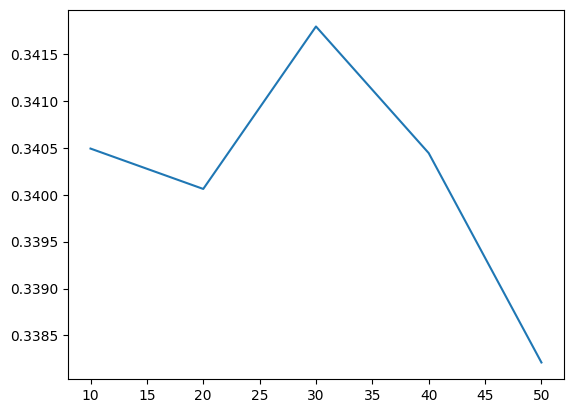

In [33]:
plt.plot(it,accu)

1. Yes, the results are more consistern and the variance is much smaller
2. Yes, the train and validation accuracy are very much close now, as compared to earlier.
3. The accuracy increases at first , recches it peak in the middle, then decreases for further iterations.
4. It can be done, but as from the plot, it is clear that the increase is marginal and very incossistent, thus it is not a practical solution